<h1>HW4</h1>

# Question 1
### (Binomial) Read the following example and complete the exercises 

#### Tossing a Biased Coin
You are asked if you want to bet on a coin. 
```
You have 10 coin tosses. 
```
```
If you get exactly 5 heads, you win 30 dollars. 
```
```
Otherwise you loss 10 dollars. 
```
```
Based on our previous observation, the coin is biased. The chance of getting head is approximately 0.4. 
```
Now you need to think about if you want to play it or not. 

### 1.1 

You recall that binomial distribution is commonly used to determine the probability of observing a specified number of successful outcomes in a specified number of trials. The equation for pdf of binomial distribution is: 

\begin{equation*}
P(X = k) = \frac{n!}{k!(n-k)!}p^k(1-p)^{n-k}
\end{equation*}

Where 
```
k: Number of successful trials
n: Total number of trials
p: Probability of success in one trial
```

Create a functon to calculate the pdf of a binomial distribution

```
Function name: binomial_p
```
```
Input: n, k, p
```
```
Output: pdf of a binomial distribution
```
```
Example: binomial_p(10, 2, 0.4) = 0.12093235199999998
```

In [17]:
function binomial_p(n,k,p)
    n! = 1
    for i in 1:n
        n! *= i
    end
    k! = 1
    for j in 1:k
        k! *= j
    end
    a = n-k
    a! = 1
    for m in 1:a
        a! *= m
    end
    n!/k!/a!*(p^k)*((1-p)^a)
end
binomial_p(10,2,0.4)


0.12093235199999998

### 1.2 

Now you want to use the function to calculate the probabilities of 
1. Winning the bet
2. Losing the bet

The chance of winning the bet:

In [18]:
P_win = binomial_p(10,5,0.4)

0.20065812480000003

The chance of losing the bet:

In [20]:
P_lose = 1 - P_win

0.7993418752

### 1.3

Would you expect yourself earning or losing money in the game?

\*Hint: What is the expected outcome

In [21]:
Outcome = P_win * 30 + P_lose * (-10)

-1.973675007999999

I will probably lose 1.97 dollars.

### 1.4

1. What if you need to get exactly 4 heads to win the game? What are the probabilities of winning and losing? 

2. Would you expect yourself earning or losing money in this case?

In [23]:
P_win = binomial_p(10,4,0.4)

0.250822656

In [25]:
P_lose = 1 - P_win

0.749177344

In [26]:
Outcome = P_win * 30 + P_lose * (-10)

0.03290623999999909

I will earn 0.03 dollar.

# Question 2
### (Chi-Square) Complete the following exercises 


#### Run the following three cells to define x, y_true, noise, and y_oberved

1. x = 0:1:10
2. y_true = 3x - 2
3. noise = N(0, $\sigma$ = 3)
4. y_observed = y_true + noise


In [5]:
import Pkg
Pkg.add(["Distributions", "Plots", "Polynomials", "Random", "Statistics"])

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [62]:
import Distributions as di
import Plots
import Polynomials
import Random
import Statistics

In [205]:
x = 0:1:10
y_true = 3 .* x .- 2
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise

11-element Vector{Float64}:
  0.057679297847839095
  4.847161877306591
  3.6027398264534845
  2.0925809462324096
  9.715726988996535
 12.997411076734133
 13.819052780882327
 19.490824372608238
 22.874781739549775
 18.713798616795508
 28.615184801051402

In [160]:
length(x)

11

### 2.1

1. Fit the data with a first order polynomial
2. Store the coefficients of the fitted polynomial in fit_coeff

In [223]:
using Polynomials
line_fit = fit(x,y_observed,1)
fit_coeff = coeffs(line_fit)

2-element Vector{Float64}:
 -1.7274383368400514
  2.7808284304213005

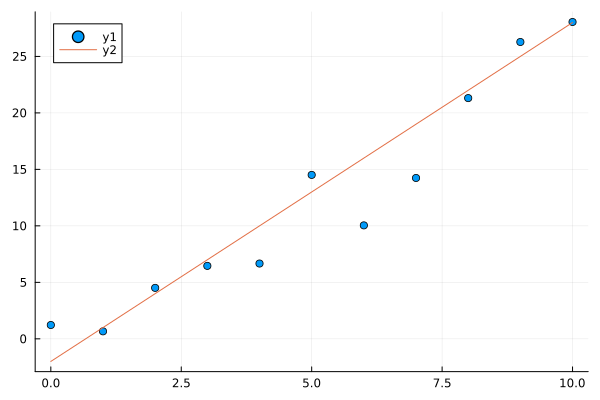

In [224]:
using Plots
scatter(x,y_observed)
plot!(x,y_true)

### 2.2

Given $\chi^2$ defined as:
$$\chi^{2}=\sum_{i}^{N}{\frac{(y_{i}-f(x_{i},\theta))^2}{\sigma_{i}^2}}$$

Create a function to calculate Chi-square value for the $1^{st}$ order polynomial fit

```
Function name: chisqr
```
```
Input: b, m, x, y_observed, sigma
```
```
m and b are the coefficients in the first order polynomial in which m * x + b = y_fit
```
```
Output: Chi-square value of the polynomial model
```

In [225]:
function chisqr(b,m,x,y_observed,sigma)
    chi = @. ((y_observed - b - m * x)^2) / (sigma^2)
    chisqr = sum(chi)
end

chi_fit = chisqr(fit_coeff[1],fit_coeff[2],x,y_observed,sigma)

7.998463059807054

### 2.3

\* Don't define random seed anywhere in the notebook
1. Create a empty list chi2_list
2. Use a for/while loop to run through the data simulation and model fitting (as done in the previous steps) 10000 times
3. In each iteration, calculate the Chi-square value for the fitted model and add it to the chi2_list


In [226]:
chi2_list = []
for i in 1:10000
    noise1 = Random.rand(di.Normal(0,sigma),11)
    y_observed = 3.0 .* x .- 2.0 .+ noise1
    fit_coeff = coeffs(fit(x,y_observed,1))
    push!(chi2_list,chisqr(fit_coeff[1],fit_coeff[2],x,y_observed,sigma))
end

### 2.4

1. Calculate the mean of chi2_list
2. Explain if the mean value (degree of freedom) make sense or not


In [227]:
chi2mean = Statistics.mean(chi2_list)

8.903728687443353

The mean value makes sense. 

\begin{equation}
\langle \chi \rangle = N - M
\end{equation}

N = 11 (the number of data points/the length of vector x)

M = 2 (the number of parameters, b and m)


### 2.5

1. Define a Chi-square distribution using the Degree of freedom from 2.4
2. Generate x_dist = 0:0.1:30
3. Calculate pdf of the Chi-square distribution using x_dist
4. Plot the chi2_list in a histogram with bin = 50 
5. Plot the pdf on top of the chi2_list histogram 

In [228]:
x_dist = 0:0.1:30
chi2 = di.Chisq(chi2mean)
pdf1 = di.pdf.(chi2,x_dist)

301-element Vector{Float64}:
 0.0
 1.4110446229106021e-6
 1.4687258290059303e-5
 5.6632945068649616e-5
 0.0001454206202505038
 0.0002988350176774663
 0.0005333836302062271
 0.000863805957199462
 0.0013028121637428218
 0.0018609669013102792
 0.002546669429278412
 0.003366198986286664
 0.004323804475375591
 ⋮
 0.0002456890073519747
 0.00023650990498067968
 0.00022766439521328897
 0.00021914077587858227
 0.00021092773626228524
 0.00020301434487827734
 0.00019539003758184927
 0.00018804460601736154
 0.00018096818639270454
 0.0001741512485730493
 0.00016758458548647213
 0.00016125930283409918

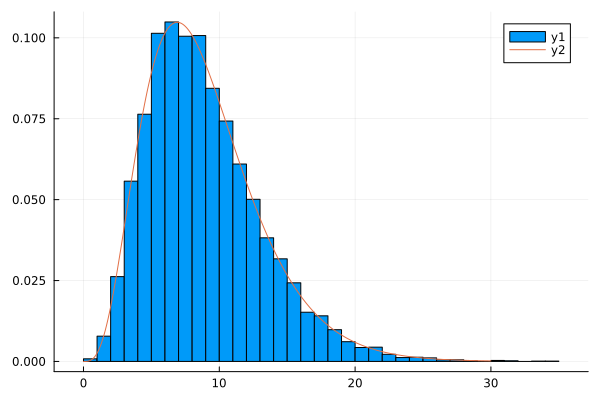

In [244]:
Plots.histogram(chi2_list, bin=50, normalize=true)
Plots.plot!(x_dist,pdf1)

### 2.6

Given the likelihood is:
$$P(\{y_{i}(x_{i})\}\mid \theta)\propto \exp\big(-\frac{\chi^2}{2}\big)$$

1. Run the following cell to create a function to calculate the likelihood (make sure you named the variables as asked in the previous questions)
2. Define m_range = 1:0.01:5
3. Define b_range = -7:0.01:3
4. Make a contour plot to visualize the distribution of the likelihood


In [245]:
chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);

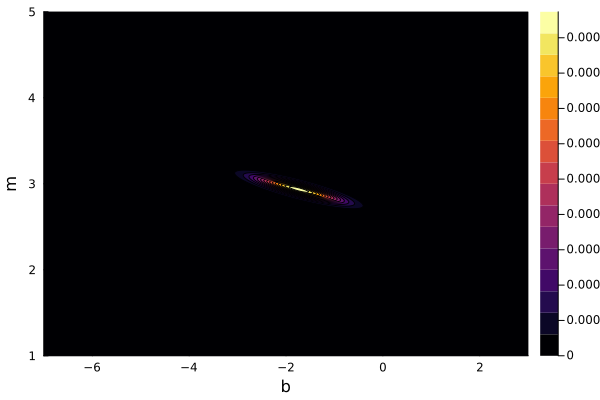

In [246]:
m_range = 1:0.01:5
b_range = -7:0.01:3
contourf(b_range,m_range,p_chi2poly,xlabel="b",ylabel="m")

### 2.7

1. Redefine x = 0:0.5:5 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6
2. Redefine x = 0:2:20 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6

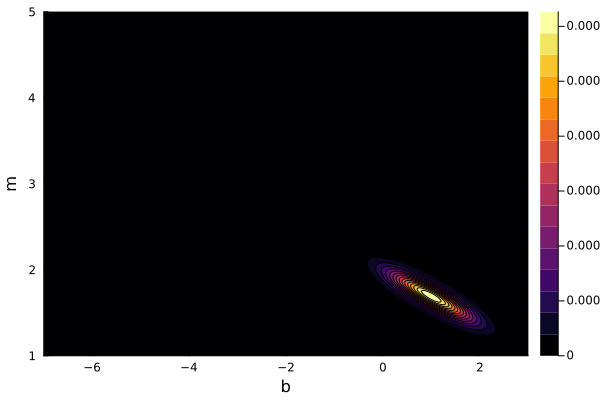

In [247]:
x = 0:0.5:5
y_true = 3 .* x .- 2
noise = Random.rand(di.Normal(0,3),length(x))
y_observed = y_true .+ noise
contourf(b_range,m_range,p_chi2poly,xlabel="b",ylabel="m")

The range of x narrows, and the high possibility area in the distribution enlarges in both x axis and y axis. When there's less data, we will become less certain about the estimation of m and b.

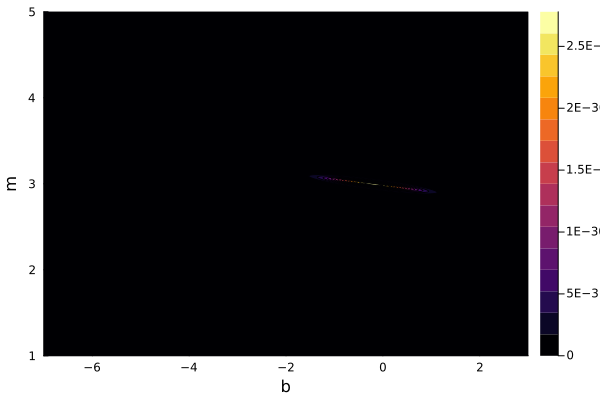

In [248]:
x = 0:2:20
y_true = 3 .* x .- 2
noise = Random.rand(di.Normal(0,3),length(x))
y_observed = y_true .+ noise
contourf(b_range,m_range,p_chi2poly,xlabel="b",ylabel="m")

The range of x enlarges, and the high possibility area of the distribution narrows. When there's more data, we will become more certain about our model.

### 2.8

Change x back to x = 0:1:10

1. Redefine sigma = 5 and update y_observed. Plot the likelihood with the new y_observed and explain how the plot is different from 2.6
2. Redefine sigma = 1 and update y_observed. Plot the likelihood with the new y_observed and explain how the plot is different from 2.6

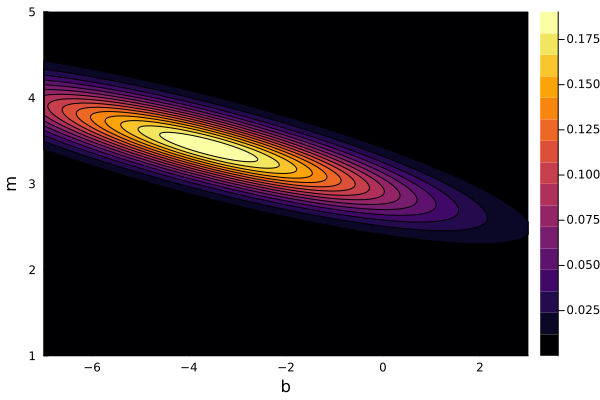

In [249]:
x = 0:1:10
y_true = 3 .* x .- 2
sigma = 5
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise
contourf(b_range,m_range,p_chi2poly,xlabel="b",ylabel="m")

A greater sigma means a larger range of y. Just like an enlarged x range, that of y will result in the uncertainty of our estimation about b and m, as shown in the larger high possibility area in the disstribution.

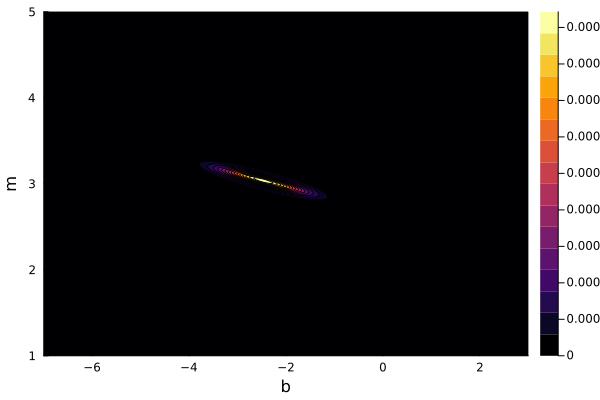

In [250]:
x = 0:1:10
y_true = 3 .* x .- 2
sigma = 1
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise
contourf(b_range,m_range,p_chi2poly,xlabel="b",ylabel="m")

In this case, we reduce the sigma of y distribution and give a narrow range of the observed values of y. Thus, we are way more certain about the estimation in b and m as shown in the plot that the possibility distribution locates in a very narrow area.